In [1]:
%load_ext autoreload
%autoreload 2
import core.plotting as plot
import seaborn as sns
import pandas as pd
import random

/wd/liza/.conda/envs/p1_develop/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
df = pd.read_csv('/data/tmp_ravenpack/RavenPack_Analytics_taxonomy_1.0.csv')
df.shape

(6895, 10)

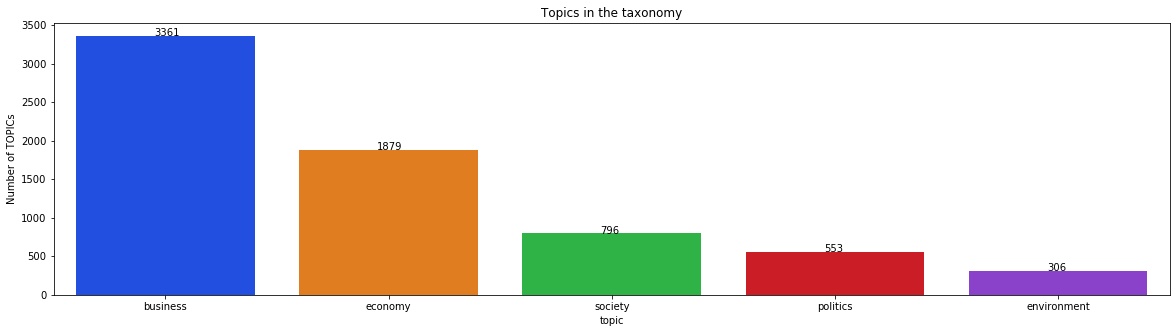

In [3]:
plot.plot_categories_count(df, "TOPIC", title = "Topics in the taxonomy")

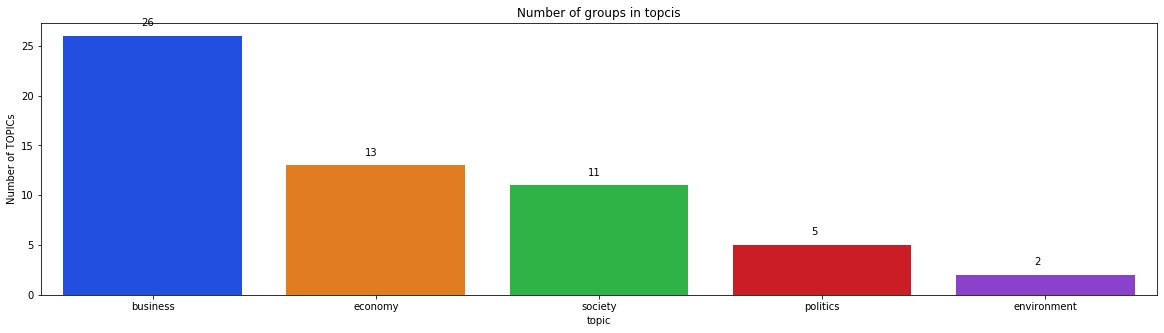

In [4]:
df_topics_groups = df[["TOPIC","GROUP"]].groupby(["TOPIC","GROUP"]).count().reset_index()
plot.plot_categories_count(df_topics_groups, "TOPIC", title = "Number of groups in topcis")

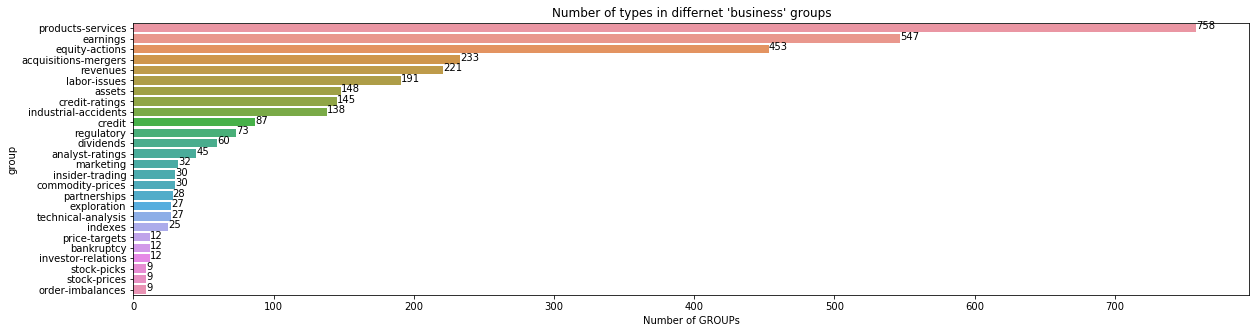

In [5]:
df_business_topic = df[df["TOPIC"] == "business"]
plot.plot_categories_count(df_business_topic, "GROUP", title = "Number of types in differnet 'business' groups")

In [6]:
df['commodity'] = df['VALID_ENTITY_TYPES'].apply(lambda x: 'COMMODITY' in x)
df_commodity = df[df['commodity'] == True]
print(df_commodity.shape)
df_commodity.head(5)

(283, 11)


,TOPIC,GROUP,TYPE,SUB_TYPE,PROPERTY,FACT_LEVEL,CATEGORY,DESCRIPTION,SCHEDULED,VALID_ENTITY_TYPES,commodity
146,business,industrial-accidents,aircraft-accident,NaN,commodity,fact,aircraft-accident-commodity,An aircraft transporting the Commodity experie...,False,COMMODITY,True
149,business,industrial-accidents,aircraft-accident,NaN,commodity,opinion,aircraft-accident-opinion-commodity,A view or opinion is expressed about the Commo...,False,COMMODITY,True
353,business,industrial-accidents,automobile-accident,NaN,commodity,fact,automobile-accident-commodity,An automobile transporting the Commodity exper...,False,COMMODITY,True
356,business,industrial-accidents,automobile-accident,NaN,commodity,opinion,automobile-accident-opinion-commodity,A view or opinion is expressed about the Commo...,False,COMMODITY,True
818,business,assets,commodity-assets,buy,target,opinion,commodity-buy-opinion-target,A view or opinion is expressed about an entity...,False,COMMODITY,True


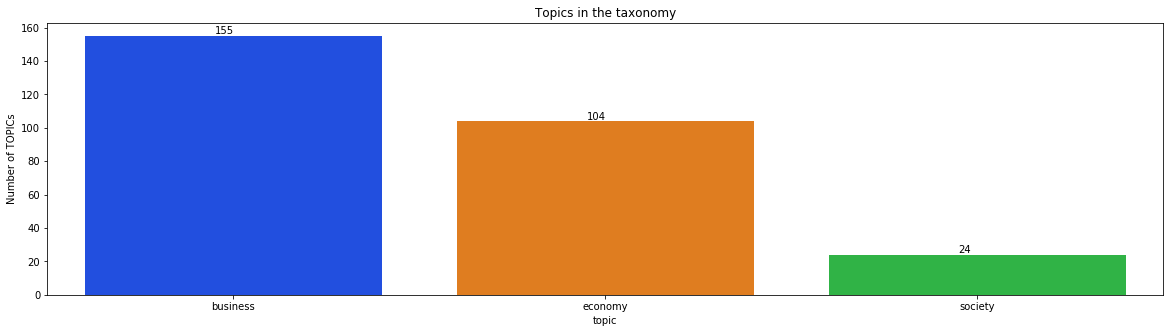

In [7]:
plot.plot_categories_count(df_commodity, "TOPIC", title = "Topics in the taxonomy")

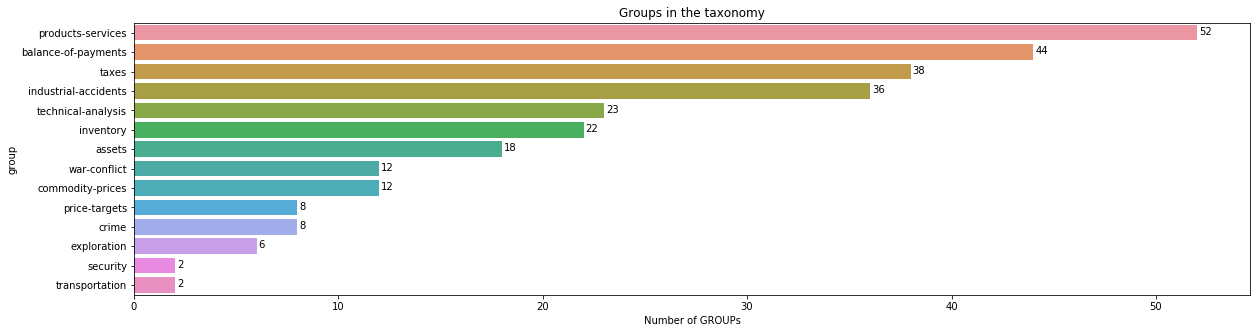

In [8]:
plot.plot_categories_count(df_commodity, "GROUP", title = "Groups in the taxonomy")

In [9]:
predictions = [random.randint(0, 1)  for x in range(0,11)]
y_test = [random.randint(0, 1)  for x in range(0,11)]

In [10]:
predictions

[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [11]:
y_test

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]

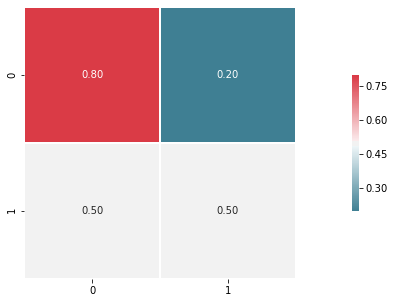

In [12]:
plot.plot_confusion_heatmap(y_test, predictions, percentage=True)

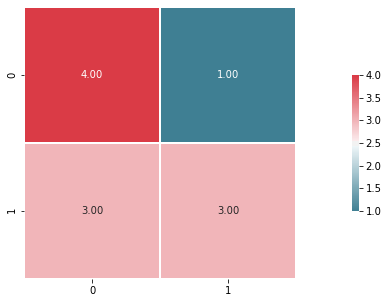

In [13]:
plot.plot_confusion_heatmap(y_test, predictions, percentage=False)